08/19/2020 moved to rstudio

In [2]:
# library(org.Hs.eg.db)
# # library(EnsDb.Hsapiens.v75)
# library(TxDb.Hsapiens.UCSC.hg19.knownGene)
# library(DiffBind)
# library(ChIPQC)
# library(ChIPseeker)
# library(ChIPpeakAnno)
# library(DESeq2)
# library(soGGi)
# library(Rsubread)
# library(tracktables)


library(pheatmap)  
library(RColorBrewer)
library(viridis)
library(reshape2)
library(AnnotationDbi) 
library(Biobase)
library(limma)
library(tximport)

library(stringr)
library(Rtsne)
library(caret)  
library(clusterProfiler)
library(pheatmap)
library(ReactomePA)
library(annotate)
library(seqinr)

from sherlock
```
cd /Users/mguo123/Documents/pan_omics_psych/data/raw/atac_narrowPeak
scp mguo123@login.sherlock.stanford.edu:/oak/stanford/groups/khavari/users/mguo123/psych_project/atac_narrowPeak_files/* .

then rename files

(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ ls
H9-Ngn2.narrowPeak	H9iN-day0.narrowPeak	H9iN-day10.narrowPeak	H9iN-day28.narrowPeak	H9iN-day4.narrowPeak	SL-Ngn2.narrowPeak	SL.narrowPeak		SLC-Ngn2.narrowPeak	SLC.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv H9-Ngn2.narrowPeak H9_D2.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv H9iN-day0.narrowPeak H9_D0.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv H9iN-day10.narrowPeak H9_D10.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv H9iN-day28.narrowPeak H9_D28.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv H9iN-day4.narrowPeak H9_D4.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv SL-Ngn2.narrowPeak SL_D2.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv SL.narrowPeak SL_D0.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv SLC.narrowPeak SLC_D0.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv SLC_D0.narrowPeak SL
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ mv SLC-Ngn2.narrowPeak SLC_D2.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ ls
H9_D0.narrowPeak	H9_D10.narrowPeak	H9_D2.narrowPeak	H9_D28.narrowPeak	H9_D4.narrowPeak	SLC_D0.narrowPeak	SLC_D2.narrowPeak	SL_D0.narrowPeak	SL_D2.narrowPeak
(base) DERM-C02ZQ972MD6R:atac_narrowPeak mguo123$ 

```

In [ ]:
peak_files <- dir("../data/raw/atac_narrowPeak", pattern = "*.narrowPeak",  full.names = TRUE)
peak_files
myPeaks <- lapply(peak_files, ChIPQC:::GetGRanges, simple = TRUE)
names(myPeaks) <- c("H9_D0","H9_D10","H9_D2","H9_D28","H9_D4","SL_D0","SL_D2","SLC_D0","SLC_D2")


# after R studio do cluster profile

In [6]:
list.files('../data/processed/fig1/atac/')
save_prefix = '../data/processed/fig1/atac/atac_time_genes_'

[1] "atac_time_genes_H9_D0.csv"       "atac_time_genes_H9_D10.csv"     
 [3] "atac_time_genes_H9_D2.csv"       "atac_time_genes_H9_D28.csv"     
 [5] "atac_time_genes_H9_D4.csv"       "atac_time_heatmap.csv"          
 [7] "atac_time_heatmap.pdf"           "atac_type0_genes_Astrocytes.csv"
 [9] "atac_type0_genes_H9_D0.csv"      "atac_type0_genes_SL_D0.csv"     
[11] "atac_type0_genes_SLC_D0.csv"     "atac_type0_heatmap.csv"         
[13] "atac_type0_heatmap.pdf"          "atac_type1_genes_Astrocytes.csv"
[15] "atac_type1_genes_H9_D2.csv"      "atac_type1_genes_SL_D2.csv"     
[17] "atac_type1_genes_SLC_D2.csv"     "atac_type1_heatmap.csv"         
[19] "atac_type1_heatmap.pdf"          "consensusToCount.RData"         
[21] "countsFromATAC.RData"

In [12]:
d0_genes = read.table(file = paste0(save_prefix, "H9_D0.csv"))$V1
d2_genes = read.table(file = paste0(save_prefix, "H9_D2.csv"))$V1
d4_genes = read.table(file = paste0(save_prefix, "H9_D4.csv"))$V1
d10_genes = read.table(file = paste0(save_prefix, "H9_D10.csv"))$V1
d28_genes = read.table(file = paste0(save_prefix, "H9_D28.csv"))$V1


In [13]:
d0_entrez = bitr(d0_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
d2_entrez = bitr(d2_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
d4_entrez = bitr(d4_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
d10_entrez = bitr(d10_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
d28_entrez = bitr(d28_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID


Loading required package: org.Hs.eg.db



'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [14]:
cluster_all <- list(H9_D0 = d0_entrez, 
                       H9_D2 = d2_entrez,
                      H9_D4 = d4_entrez,
                      H9_D10 = d10_entrez,
                      H9_D28 = d28_entrez)

In [16]:
ck_reactome_90 <- compareCluster(geneCluster = cluster_all, 
                                 fun = "enrichPathway", pAdjustMethod='none', pvalueCutoff = 1,readable=TRUE)
write.csv(ck_reactome_90, file = paste0(save_prefix, "ck_reactome_groups.csv"))

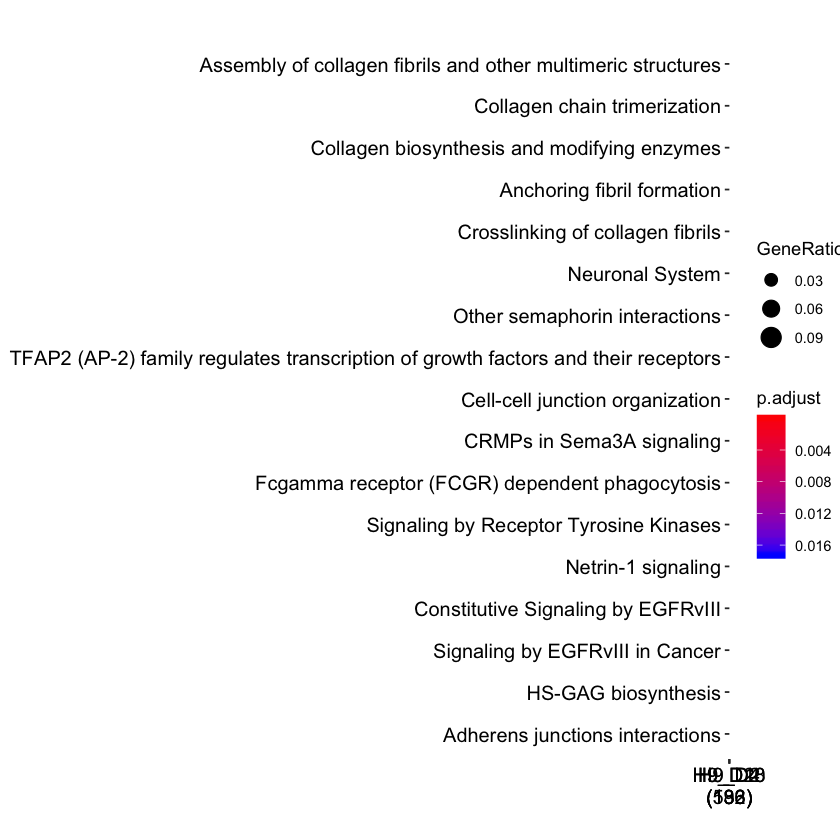

In [17]:
dotplot(ck_reactome_90)
ggsave(file = paste0(save_prefix, "ck_reactome_groups.pdf"),height=7, width=10)

In [18]:
ck_go_bp <- compareCluster(geneCluster = cluster_all, fun = "enrichGO", 
                                pAdjustMethod='BH', 
                                pvalueCutoff  = 0.05,
                                qvalueCutoff  = 0.05,
                                OrgDb='org.Hs.eg.db', 
                                ont = "BP",
                                readable=TRUE)
head(as.data.frame(ck_go_bp))
write.csv(ck_go_bp, file=paste0(save_prefix, 'ck_go_bp_05.csv'))

ck_go_mf <- compareCluster(geneCluster = cluster_all, fun = "enrichGO", 
                                pAdjustMethod='BH', 
                                pvalueCutoff  = 0.05,
                                qvalueCutoff  = 0.05,
                                OrgDb='org.Hs.eg.db', 
                                ont = "MF",
                                readable=TRUE)                              
head(as.data.frame(ck_go_mf))
write.csv(ck_go_mf, file=paste0(save_prefix, 'ck_go_mf_05.csv'))


ck_go_cc <- compareCluster(geneCluster = cluster_all, fun = "enrichGO", 
                                pAdjustMethod='BH', 
                                pvalueCutoff  = 0.05,
                                qvalueCutoff  = 0.05,
                                OrgDb='org.Hs.eg.db', 
                                ont = "CC",
                                readable=TRUE)
head(as.data.frame(ck_go_cc))
write.csv(ck_go_cc, file=paste0(save_prefix, 'ck_go_cc_05.csv'))

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,H9_D0,GO:0007411,axon guidance,27/654,276/18670,1.598424e-06,0.004160078,0.003818009,APP/DPYSL2/EPHA5/EPHA6/EPHA7/EPHB1/GAP43/GATA3/GBX2/GFRA1/GLI3/IRS2/KLF7/NCAM1/NRP2/NRXN3/NTN1/PLXNA2/PRKCA/ROBO2/SEMA3A/SEMA3E/SEMA4D/SPTBN1/TRIO/UNC5D/ZSWIM6,27
2,H9_D0,GO:0097485,neuron projection guidance,27/654,277/18670,1.713730e-06,0.004160078,0.003818009,APP/DPYSL2/EPHA5/EPHA6/EPHA7/EPHB1/GAP43/GATA3/GBX2/GFRA1/GLI3/IRS2/KLF7/NCAM1/NRP2/NRXN3/NTN1/PLXNA2/PRKCA/ROBO2/SEMA3A/SEMA3E/SEMA4D/SPTBN1/TRIO/UNC5D/ZSWIM6,27
3,H9_D0,GO:0007605,sensory perception of sound,18/654,145/18670,3.285725e-06,0.005278596,0.004844555,ASIC2/ATP6V0A4/CDC14A/CLIC5/DCDC2/GABRB3/HEXB/KCNE1/LOXHD1/LRIG2/MYO7A/PCDH15/RIPOR2/ROR1/SLC1A3/SOBP/SRRM4/WHRN,18
4,H9_D0,GO:0007163,establishment or maintenance of cell polarity,22/654,210/18670,4.861432e-06,0.005278596,0.004844555,ACTR3/AMOTL2/ANK1/AQP1/CDK5RAP2/EPHB1/FAT1/FERMT1/GATA3/KANK1/MAP1B/MAPKAP1/MPP5/MTCL1/NDE1/NUMA1/PARD3/PARD3B/RAP1B/RHOF/RIPOR2/WEE1,22
5,H9_D0,GO:0050954,sensory perception of mechanical stimulus,19/654,165/18670,5.436247e-06,0.005278596,0.004844555,ASIC2/ATP6V0A4/CDC14A/CLIC5/DCDC2/GABRB3/HEXB/KCNE1/LOXHD1/LRIG2/MYO7A/PCDH15/RIPOR2/ROR1/SLC1A3/SOBP/SRRM4/TRPA1/WHRN,19
6,H9_D0,GO:0010975,regulation of neuron projection development,38/654,499/18670,6.610908e-06,0.005349327,0.004909469,ALK/ALKAL1/APBB1/ARSB/CAPRIN1/CBFA2T2/CNR1/CSMD3/CUX1/DAB2IP/DPYSL2/EPHA7/FZD1/GATA3/INPP5F/KALRN/KANK1/KATNB1/KIF13B/LRIG2/MAP1B/NCK1/NLGN1/NR2E1/NTN1/PLXNA2/PREX1/PTPRG/RAP2A/ROBO2/SEMA3A/SEMA3E/SEMA4D/SLITRK1/STK24/SYT4/TMEM106B/ZSWIM6,38


,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,H9_D0,GO:0005543,phospholipid binding,33/644,427/17697,4.150810e-05,0.032708380,0.031109226,AMER3/AMPH/ANXA10/APOB/CLVS1/CPNE4/CPNE8/DAB2IP/EEA1/EPB41/GAP43/JAG1/KCNJ2/LDLRAP1/MAP1B/MAPKAP1/MFGE8/MYO10/NUMA1/OSBPL1A/PARD3/PARD3B/PCLO/PCYT1A/PLD1/PLEKHA5/PREX1/RAG2/RPE65/SNX31/SPTBN1/SYT4/WDFY3,33
2,H9_D2,GO:0030020,extracellular matrix structural constituent conferring tensile strength,6/221,41/17697,1.106035e-05,0.004789133,0.004517282,COL14A1/COL4A1/COL4A4/COL4A5/COL6A5/COL8A1,6
3,H9_D2,GO:0005005,transmembrane-ephrin receptor activity,4/221,17/17697,4.957879e-05,0.009889508,0.009328137,EPHA4/EPHA5/EPHA6/EPHA7,4
4,H9_D2,GO:0005003,ephrin receptor activity,4/221,19/17697,7.917380e-05,0.009889508,0.009328137,EPHA4/EPHA5/EPHA6/EPHA7,4
5,H9_D2,GO:0051393,alpha-actinin binding,5/221,37/17697,9.135804e-05,0.009889508,0.009328137,KCNN2/PALLD/PDLIM1/PKD2L1/XIRP2,5
6,H9_D2,GO:0005201,extracellular matrix structural constituent,9/221,163/17697,2.130506e-04,0.018450178,0.017402867,ABI3BP/AMBN/COL14A1/COL4A1/COL4A4/COL4A5/COL6A5/COL8A1/SRPX2,9


,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,H9_D0,GO:0098858,actin-based cell projection,21/695,208/19717,1.554903e-05,0.008505319,0.007479901,APBB1/APP/CDC14A/CTNNB1/DMD/EPHB1/FAT1/GAP43/ITGAV/KIF13B/LOXHD1/MYO10/MYO7A/NLGN1/OSBPL3/PCDH15/RIPOR2/S100P/TENM2/UTRN/WHRN,21
2,H9_D0,GO:0043025,neuronal cell body,36/695,497/19717,3.890701e-05,0.010641066,0.009358159,ADRA2C/APBB1/APOB/APP/ASCL1/ASIC2/BRINP1/BRINP3/CNTNAP2/CTNND2/DAB2IP/EPHA5/EPHA7/FXR1/GRIK3/INPP5F/KATNB1/KCNB1/KCNJ2/KCNN3/LRIG2/MAP1B/MYO10/NUMA1/OPRK1/OPRM1/PARD3/PCSK2/PDE10A/PPARGC1A/SLC1A3/SNAP47/SYT4/TMEM266/WDFY3/WHRN,36
3,H9_D0,GO:0030175,filopodium,13/695,104/19717,7.424418e-05,0.010984150,0.009659880,APBB1/APP/DMD/EPHB1/FAT1/GAP43/ITGAV/MYO10/NLGN1/OSBPL3/RIPOR2/TENM2/UTRN,13
4,H9_D0,GO:0033267,axon part,29/695,382/19717,9.625187e-05,0.010984150,0.009659880,ADRA2C/ANK1/APBB1/APP/AUTS2/CNR1/CNTNAP2/EEA1/ERC2/GAP43/GRIK3/HTR1B/IQCJ-SCHIP1/KATNB1/KIF13B/LAMP5/LRIG2/MAP1B/NOS1/OPRK1/PARD3/PREX1/RASGRF1/ROBO2/ROR1/SPTBN1/TENM2/UTRN/WHRN,29
5,H9_D0,GO:0031253,cell projection membrane,27/695,345/19717,1.004036e-04,0.010984150,0.009659880,ANK1/AQP1/ARHGEF4/ATP6V0A4/CDHR1/CNTNAP2/CTNNB1/DMD/DPP4/FERMT1/GABRG3/GAP43/GUCY2D/ITGAV/KANK1/KCNB1/LAMP5/MYO10/OPRM1/PDE6H/PKD2L1/PSD3/RIPOR2/ROBO2/S100P/SPTBN1/UTRN,27
6,H9_D0,GO:0044304,main axon,10/695,68/19717,1.272900e-04,0.011604602,0.010205529,ANK1/APBB1/APP/CNTNAP2/IQCJ-SCHIP1/KIF13B/MAP1B/PARD3/ROBO2/SPTBN1,10


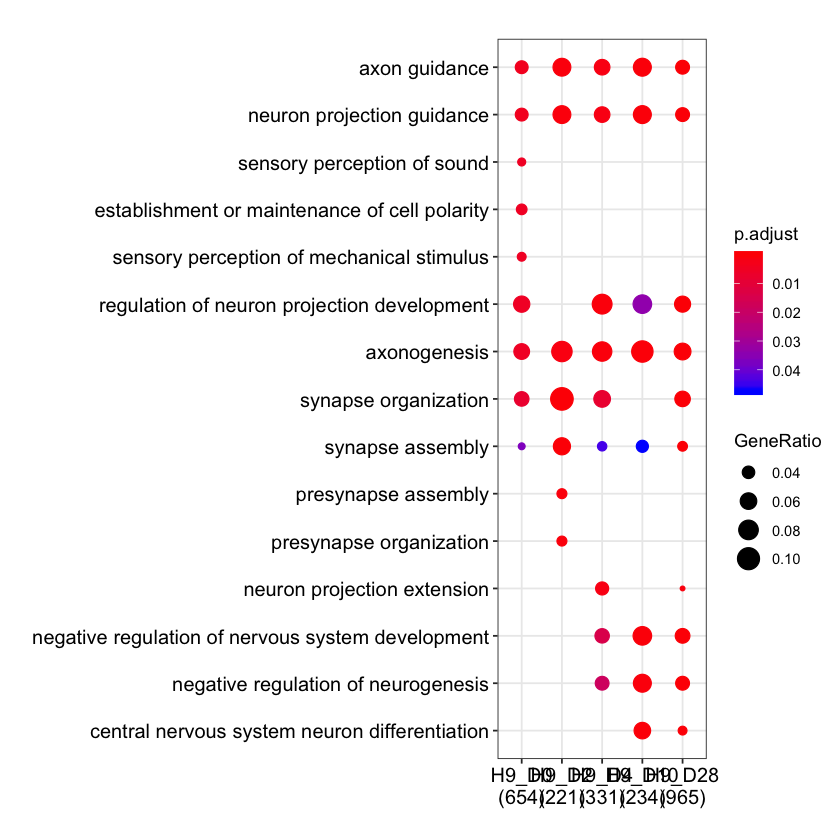

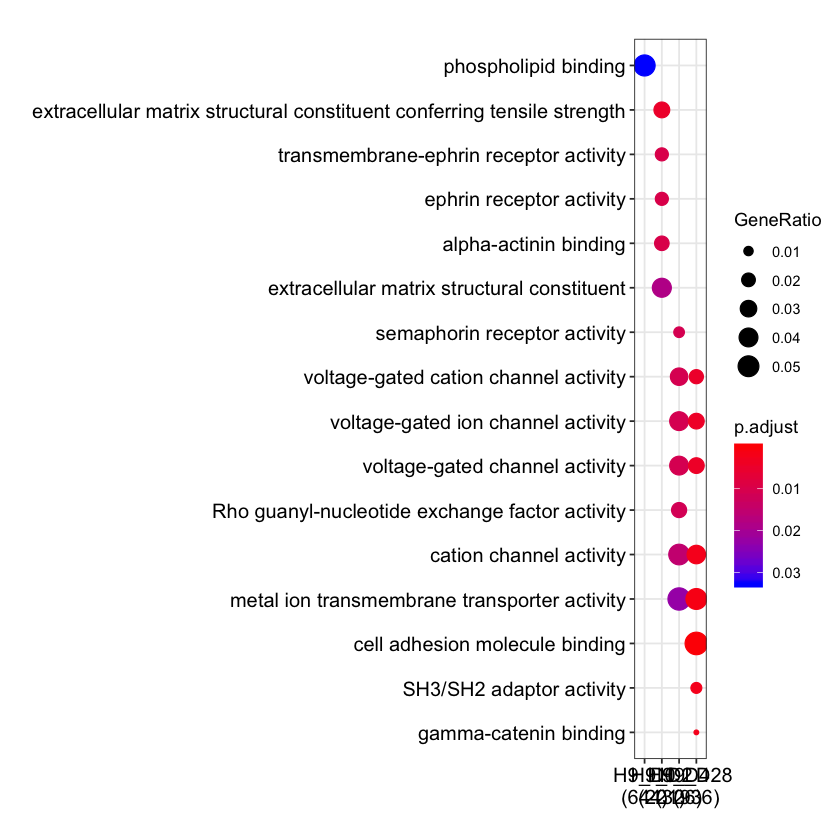

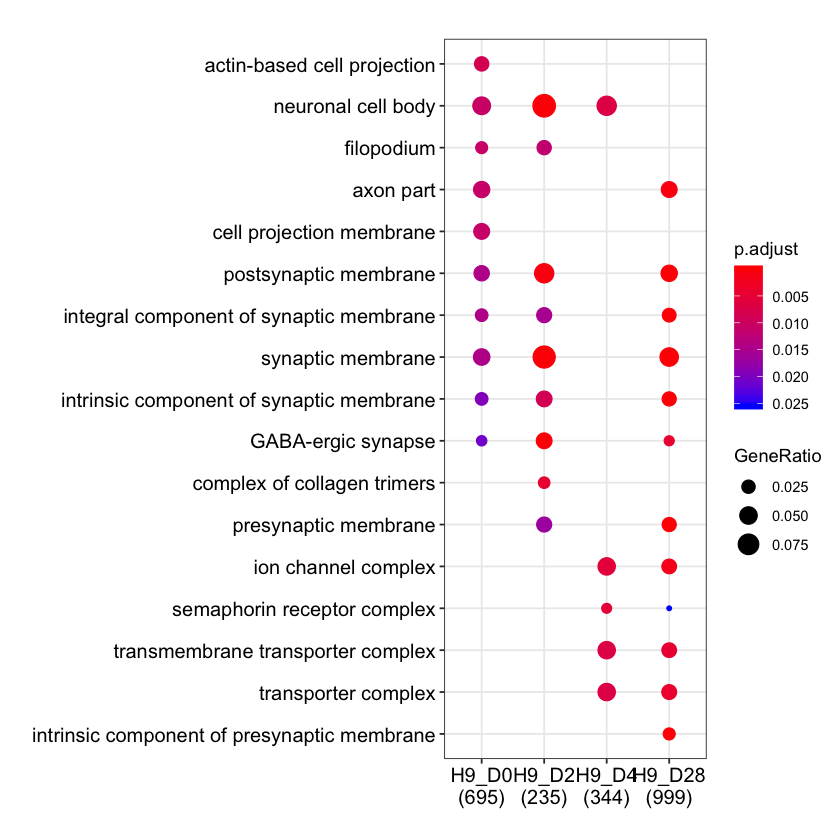

In [19]:
dotplot(ck_go_bp)
ggsave(file = paste0(save_prefix, "ck_go_bp_groups.pdf"),height=7, width=10)
dotplot(ck_go_mf)
ggsave(file = paste0(save_prefix, "ck_go_mf_groups.pdf"),height=7, width=10)
dotplot(ck_go_cc)
ggsave(file = paste0(save_prefix, "ck_go_cc_groups.pdf"),height=7, width=10)